In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
matplotlib.rcParams["figure.dpi"] = 1000
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

### Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Monthly SFU till 2020
data=pd.read_csv('/content/drive/MyDrive/Deekshitha/Datasets/Done_Dusted/monthly_f10_2005.csv')
data.set_index('time-tag', inplace=True)
data.index = pd.to_datetime(data.index)
df=data.index<='2020-12-01'
df=data[df]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195 entries, 2004-10-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f10.7   195 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [ ]:
# Generate Future Time Periods

# Start date
start_date = '2021-01-01'

# Number of months to generate
num_months = 132

# Generate a date range from the start date, with a frequency of 'MS' (month start)
date_range = pd.date_range(start=start_date, periods=num_months, freq='MS')

# Convert to a list and print the result
print(date_range.tolist())

[Timestamp('2021-01-01 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-06-01 00:00:00'), Timestamp('2021-07-01 00:00:00'), Timestamp('2021-08-01 00:00:00'), Timestamp('2021-09-01 00:00:00'), Timestamp('2021-10-01 00:00:00'), Timestamp('2021-11-01 00:00:00'), Timestamp('2021-12-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'), Timestamp('2022-03-01 00:00:00'), Timestamp('2022-04-01 00:00:00'), Timestamp('2022-05-01 00:00:00'), Timestamp('2022-06-01 00:00:00'), Timestamp('2022-07-01 00:00:00'), Timestamp('2022-08-01 00:00:00'), Timestamp('2022-09-01 00:00:00'), Timestamp('2022-10-01 00:00:00'), Timestamp('2022-11-01 00:00:00'), Timestamp('2022-12-01 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('2023-03-01 00:00:00'), Timestamp('2023-04-01 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('20

### SARIMA Model

In [ ]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12*11  # Assuming 11 year seasonality

# Fit the SARIMA model
model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Forecast

In [ ]:
# Forecast Future Values
forecast = results.get_forecast(steps=132) #Forecast for next 11 years
forecast_mean = forecast.predicted_mean
print(forecast_mean)

2021-01-01    86.853688
2021-02-01    88.310968
2021-03-01    85.736364
2021-04-01    78.176647
2021-05-01    75.957698
                ...    
2031-08-01    66.380544
2031-09-01    68.284181
2031-10-01    70.679218
2031-11-01    75.841832
2031-12-01    77.458118
Freq: MS, Name: predicted_mean, Length: 132, dtype: float64


### Forecast Plot

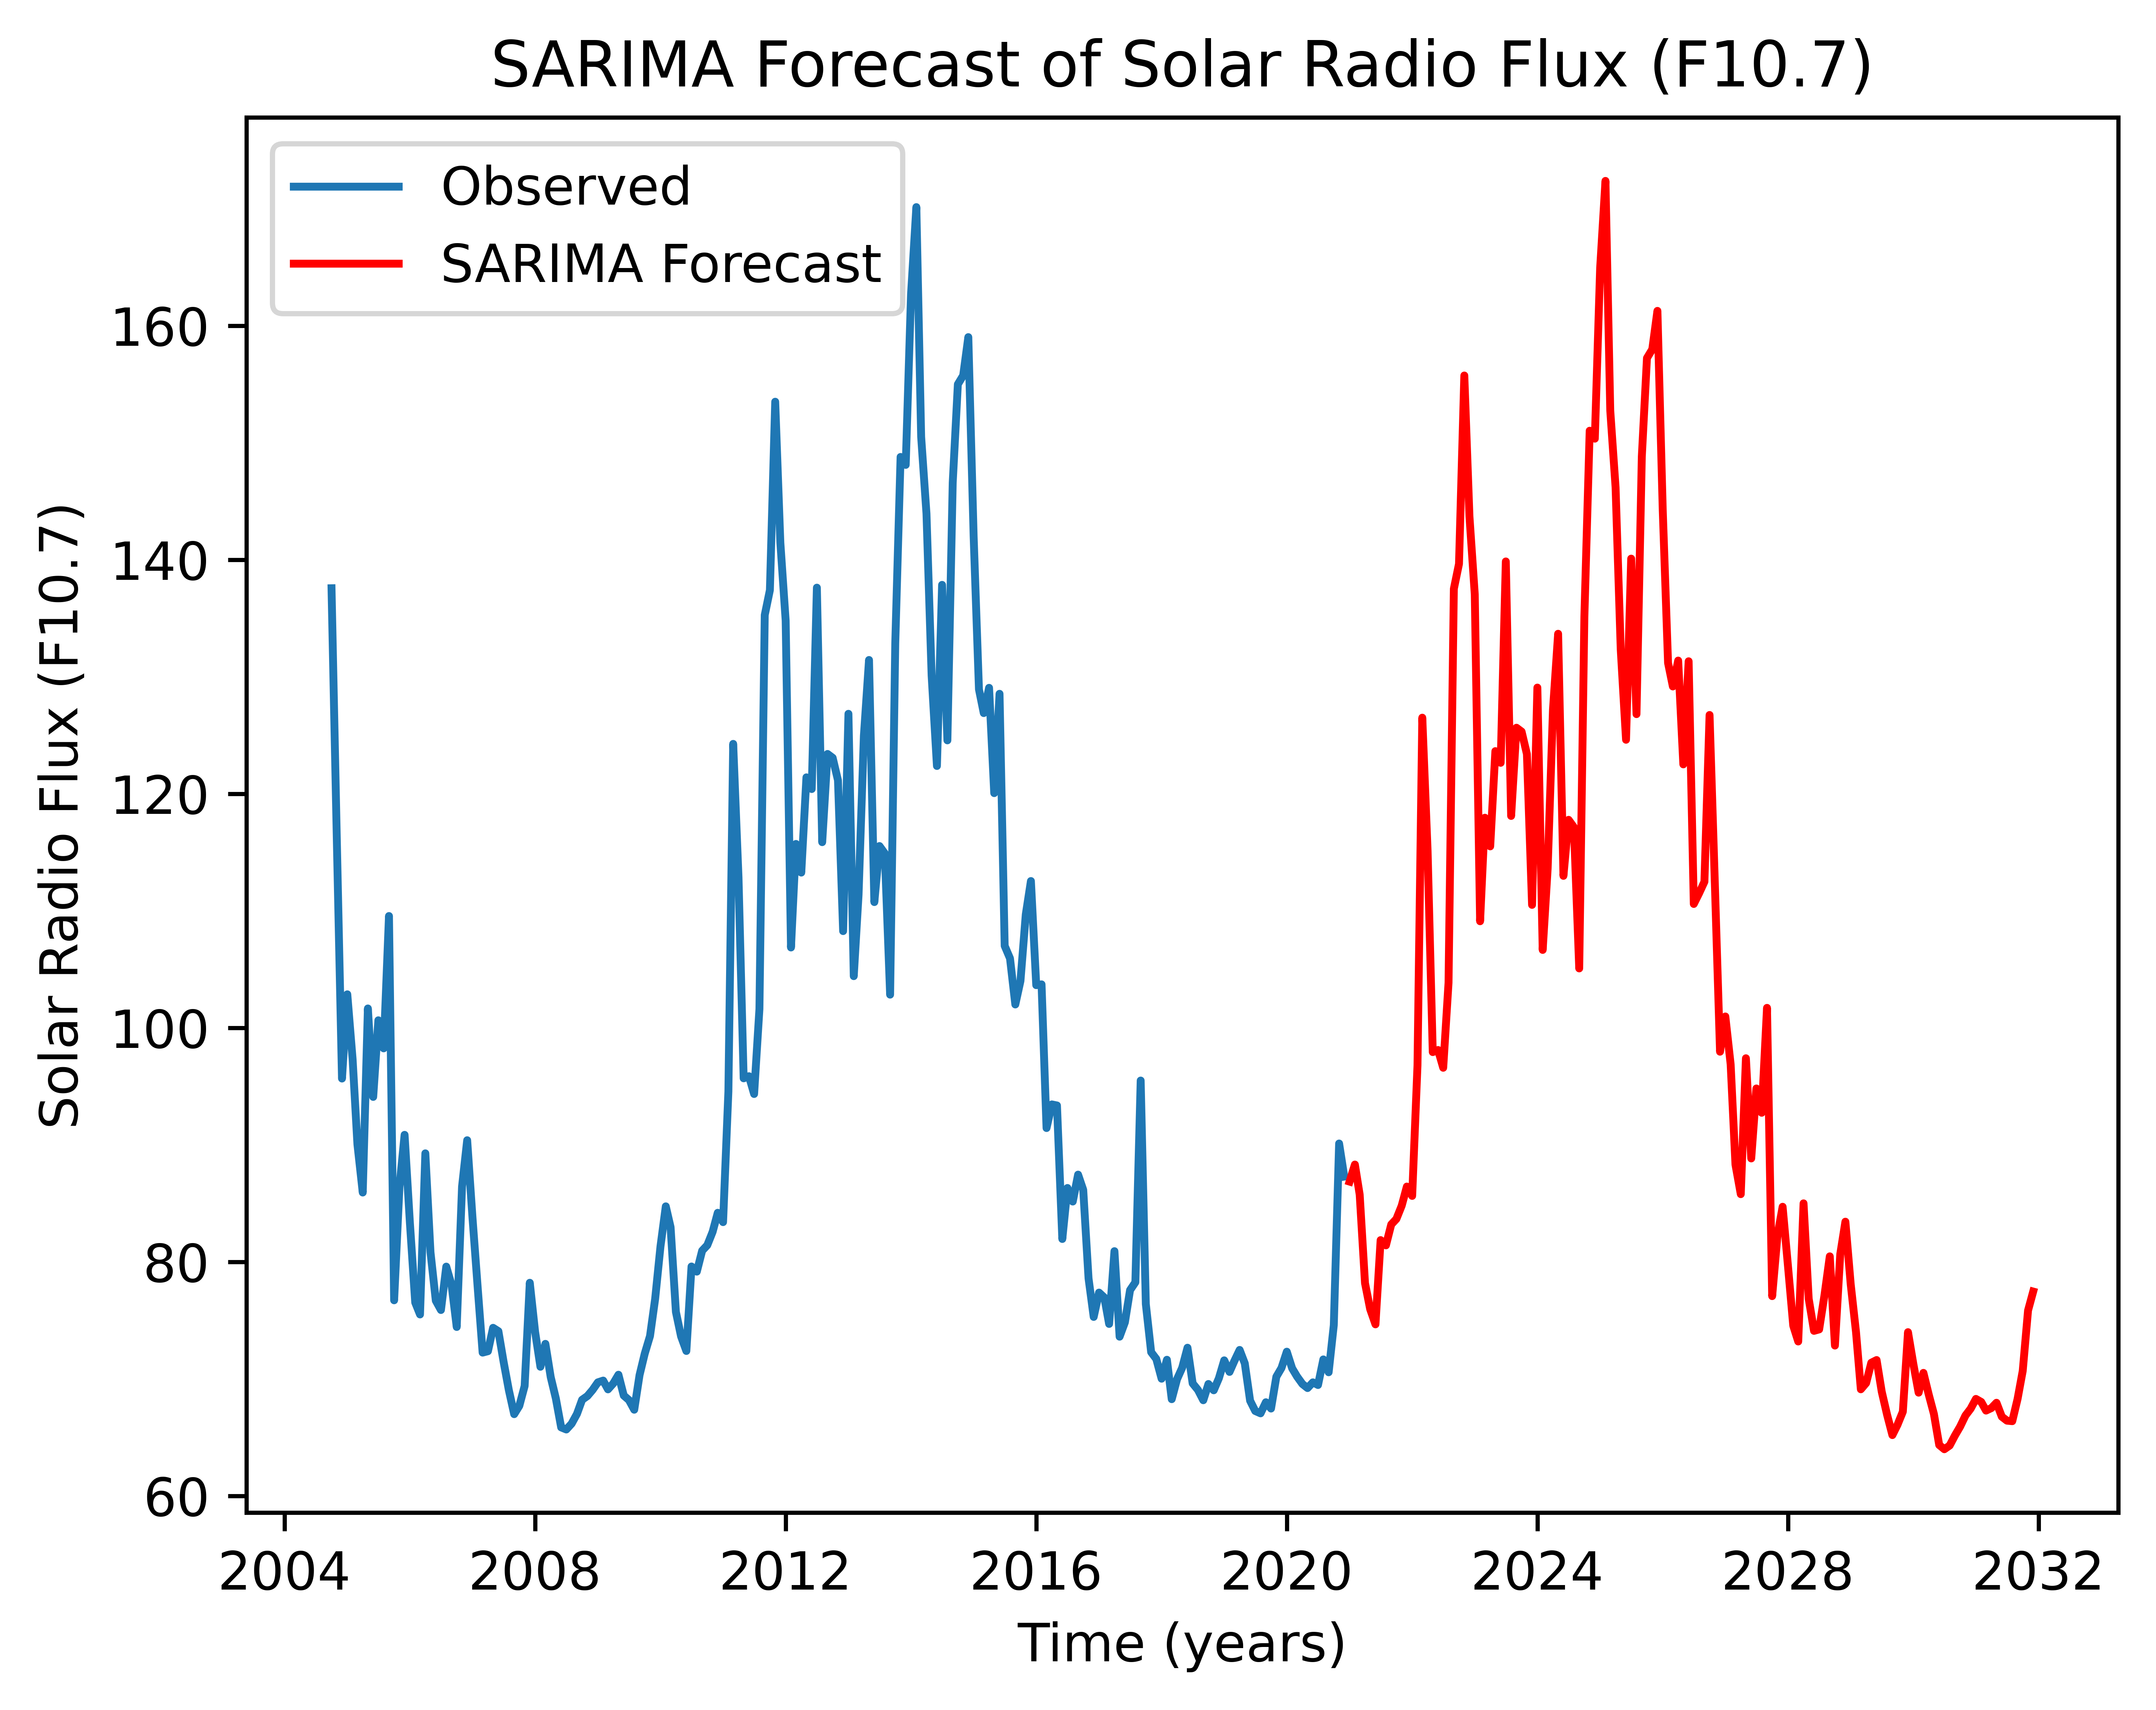

In [ ]:
# Plot the forecast
fig, ax = plt.subplots()
sns.lineplot(x=df.index, y=df['f10.7'], label='Observed')
sns.lineplot(x=date_range, y=forecast_mean, label='SARIMA Forecast', color='red')
#plt.fill_between(xmnew, fclow, fcupp, color='pink')
ax.set(xlabel='Time (years)', ylabel='Solar Radio Flux (F10.7)')
plt.title('SARIMA Forecast of Solar Radio Flux (F10.7)')
plt.legend()
plt.savefig('SARIMA.png', dpi=2000, bbox_inches='tight')
plt.show()

In [ ]:
sarima_forecast = pd.DataFrame(forecast_mean)
sarima_forecast.to_csv('sarima_forecast.csv')
sarima_forecast.info()
sarima_forecast['Date'] = date_range
sarima_forecast.set_index('Date', inplace=True)
sarima_forecast.head()
sarima_forecast.to_csv('sarima_forecast.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2021-01-01 to 2031-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   predicted_mean  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


### Comparison with NASA and Observed Values

In [ ]:
nasa_test = pd.read_csv('/content/drive/MyDrive/Deekshitha/Datasets/Done_Dusted/NASA.csv')
nasa_test.rename(columns={'Unnamed: 0': 'Year','Unnamed: 1': 'Month','95.00%': 'SF10.7'}, inplace=True)
nasa_test = nasa_test.iloc[:, :3]
nasa_test['Year']=nasa_test.Year.astype(str)
nasa_test['Year'] = nasa_test['Year'].str.split('.').str[0]
nasa_test['Month'] = pd.to_datetime(nasa_test['Month'], format='%b', errors='coerce').dt.month
nasa_test['Month']=nasa_test.Month.astype(str)
nasa_test['time-tag'] = pd.to_datetime(nasa_test['Year'] + '-' + nasa_test['Month'])
nasa_test.head()

,Year,Month,F10.7(95%),time-tag
0,2019,12,69.7,2019-12-01
1,2020,1,70.2,2020-01-01
2,2020,2,71.1,2020-02-01
3,2020,3,72.1,2020-03-01
4,2020,4,73.2,2020-04-01


In [ ]:
# NOAA Dataset for 25th Solar Cycle
file_path = '/content/drive/MyDrive/Deekshitha/Datasets/Done_Dusted/observed-solar-cycle-indices.json'
df = pd.read_json(file_path)

In [ ]:
df1=df.drop(df[df['f10.7'] == -1.0].index, axis=0)
df1['time-tag'] = pd.to_datetime(df1['time-tag'])

In [ ]:
df_filtered = df1[df1['time-tag'].dt.year > 2020]
df_filtered.head()

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
3264,2021-01-01,10.4,17.3,11.13,16.7,76.07,77.3
3265,2021-02-01,8.2,19.0,8.36,18.6,74.32,78.0
3266,2021-03-01,17.2,21.7,17.03,21.3,76.48,79.0
3267,2021-04-01,24.5,24.8,24.83,24.4,74.74,80.3
3268,2021-05-01,21.2,25.8,20.03,25.7,75.64,80.8


In [ ]:
# Filter forecast data after 2020
sarima_forecast_after_2025 = sarima_forecast[sarima_forecast.index > '2020-01-01']

# Set a beautiful style using seaborn
sns.set_theme(style="dark")
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') # Another elegant style

# Create the line plot with enhanced aesthetics
plt.plot('time-tag','F10.7(95%)',data=nasa_test, color="#008080", linewidth=1.5,label="NASA's Forecast of 25th Solar Cycle" ) # Cornflower blue
#plt.plot(sarima_forecast.index,'predicted_mean',data=sarima_forecast, color="#FF0000", linewidth=1.5,label="SARIMA Model's Forecast of 25th Solar Cycle" )
plt.plot('time-tag','f10.7',data=df_filtered, color="#0009FF", linewidth=1.5, label="Observed Values of 25th Solar Cycle") # Light blue
# Add a subtle gradient fill under the curve
#plt.fill_between(years, sunspot_numbers, alpha=0.2, color="#ADD8E6") # Light blue

plt.plot(
    sarima_forecast_after_2025.index,
    sarima_forecast_after_2025['predicted_mean'],
    color="#FF0000",
    linewidth=1.5,
    label="SARIMA Model's Forecast of 25th Solar Cycle"
)

plt.xlabel("Year")
plt.ylabel("Forecasted Value")
plt.title("SARIMA Forecast for the rest of the 25th Solar Cycle")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('SARIMA_forecast.png', dpi=2000, bbox_inches='tight')


NameError: name 'sarima_forecast' is not defined